# Nonlinear Equations

We want to find a root of the nonlinear function $f$ using different methods.

1. Bisection method
2. Newton method
3. Chord method
4. Secant method
5. Fixed point iterations





In [1]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
import sympy as sym


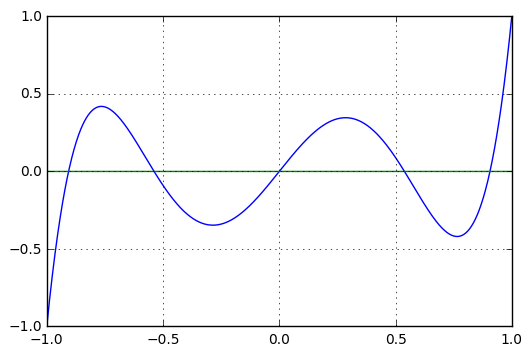

In [2]:
t = sym.symbols('t')

f_sym = t/8. * (63.*t**4 - 70.*t**2. +15.) # Legendre polynomial of order 5

f_prime_sym = sym.diff(f_sym,t)

f = sym.lambdify(t, f_sym, 'numpy')
f_prime = sym.lambdify(t,f_prime_sym, 'numpy')

phi = lambda x : 63./70.*x**3 + 15./(70.*x)
#phi = lambda x : 70.0/15.0*x**3 - 63.0/15.0*x**5
#phi = lambda x : sqrt((63.*x**4 + 15.0)/70.)

# Let's plot
n = 1025

x = linspace(-1,1,n)
c = zeros_like(x)

_ = plot(x,f(x))
_ = plot(x,c)
_ = grid()


In [3]:
# Initial data for the variuos algorithms

# interval in which we seek the solution 
a = 0.2
b = 0.7

# initial points
x0 = (a+b)/2.0
x00 = b


In [4]:
# stopping criteria
eps = 1e-10
n_max = 1000

## Bisection method

CPU times: user 49 ms, sys: 4 ms, total: 53 ms
Wall time: 49.8 ms
0.53846931014
5.82076609135e-11
32


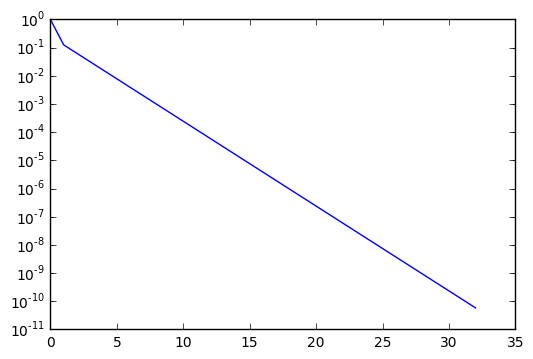

In [5]:
def bisect(f,a,b,eps,n_max):
    a_new = a
    b_new = b
    x = mean([a,b]) # (a+b)/2
    error_ = 1.
    error = [1.]
    it = 0
    while (error_ > eps and it < n_max):
        if ( f(a_new)*f(x) < 0 ):
            # root in (a_new, x)
            b_new = x
        else:
            # root in (x,b_new)
            a_new = x
            
        x_new = mean([a_new,b_new])
        error_ = 0.5*abs(b_new-a_new)
        error.append(error_)
        x = x_new
        it += 1
        
    semilogy(error)    
    return x, error, it
    
%time root_bisect, error_bisect, it_bisect = bisect(f,a,b,eps,n_max)    

print root_bisect
print error_bisect[-1]
print it_bisect

             
        

In [6]:
# is the number of iterations coherent with the theoretical estimation?

In order to find out other methods for solving non-linear equations, let's compute the Taylor's series of $f(x^k)$ up to the first order 

$$
f(x^k) \simeq f(x^k) + (x-x^k)f^{\prime}(x^k)
$$
which suggests the following iterative scheme
$$
x^{k+1} = x^k - \frac{f(x^k)}{f^{\prime}(x^k)}
$$

The following methods are obtained applying the above scheme where

$$
f^{\prime}(x^k) \approx q^k
$$

## Newton's method
$$
q^k = f^{\prime}(x^k)
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q^k}
$$

CPU times: user 53 ms, sys: 0 ns, total: 53 ms
Wall time: 49.6 ms
0.538469310106
2.22044604925e-16
5


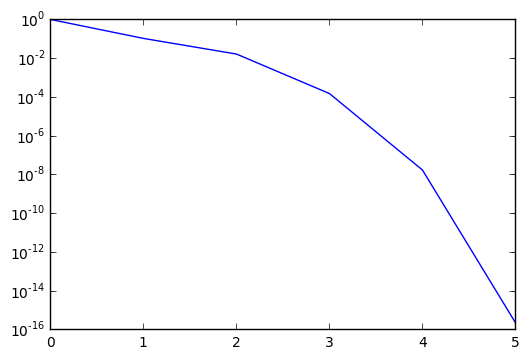

In [7]:
def newton(f,f_prime,x0,eps,n_max):
    error_ = 1.
    error = [error_]
    it = 0
    x = x0
    while(error_ > eps and it < n_max):
        q = f_prime(x)
        x_new = x - f(x)/q
        error_ = abs(x_new - x)
        x = x_new
        error.append(error_)
        it += 1
        
    semilogy(error)    
    return x, error, it
 
%time root_newton, error_newton, it_newton = newton(f,f_prime,x0, eps, n_max)
print root_newton
print error_newton[-1]
print it_newton

## Chord method

$$
q^k \equiv q = \frac{f(b)-f(a)}{b-a}
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q}
$$

CPU times: user 58 ms, sys: 6 ms, total: 64 ms
Wall time: 58.6 ms
0.538469310142
8.05252531322e-11
97


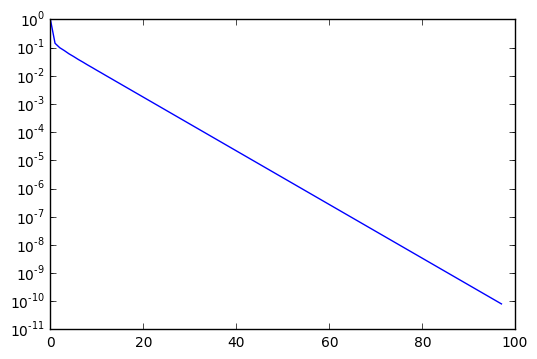

In [8]:
def chord(f,a,b,x0,eps,n_max):
    q = (f(b)-f(a))/(b-a)
    error_ = 1.
    error = [error_]
    it = 0
    x = x0
    while(error_ > eps and it < n_max):
        x_new = x - f(x)/q
        error_ = abs(x_new - x)
        error.append(error_)
        x = x_new
        it += 1
        
    semilogy(error)    
    return x, error, it



%time root_chord, error_chord, it_chord = chord(f,a,b, x0, eps, n_max)

print root_chord
print error_chord[-1]
print it_chord
    
    

## Secant method

$$
q^k = \frac{f(x^k)-f(x^{k-1})}{x^k - x^{k-1}}
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q^k}
$$

Note that this algorithm requirs **two** initial points

CPU times: user 58 ms, sys: 0 ns, total: 58 ms
Wall time: 56 ms
0.538469310106
1.11022302463e-16
6


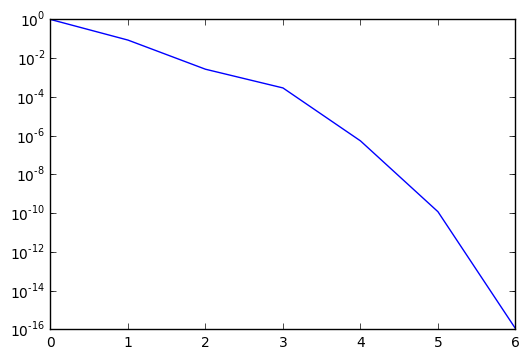

In [9]:
def secant(f,x0,x00,eps,n_max):
    error_ = 1.
    error = [error_]
    it = 0
    x_k = x0
    x_kk = x00
    while (error_ > eps and it < n_max):
        q_k = (f(x_k) - f(x_kk))/(x_k - x_kk)
        x_new = x_k - f(x_k)/q_k 
        error_ = abs(x_new - x_k)
        error.append(error_)
        x_kk = x_k
        x_k = x_new
        x_p = x
        it += 1
        
    semilogy(error)    
    return x_new, error, it

%time root_secant, error_secant, it_secant = secant(f,x0,x00,eps,n_max)

print root_secant
print error_secant[-1]
print it_secant

## Fixed point iterations

$$
f(x)=0 \to x-\phi(x)=0
$$

$$
x^{k+1} = \phi(x^k)
$$

CPU times: user 62 ms, sys: 4 ms, total: 66 ms
Wall time: 59.4 ms
0.538469310108
6.03431749013e-11
11


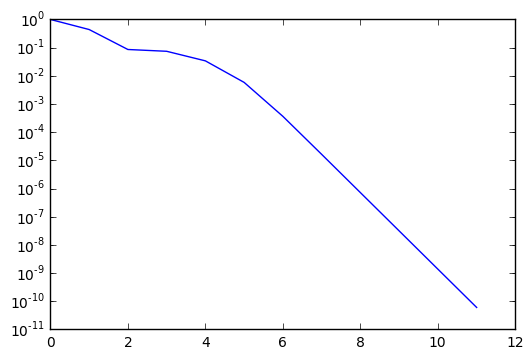

In [10]:
def fixed_point(phi,x0,eps,n_max):
    x=x0
    error_ = 1.
    error = [error_]
    it = 0
    while (error_ > eps and it<n_max):
        x_new = phi(x)
        error_ = abs(x_new - x)
        x = x_new
        it += 1
        error.append(error_)
        
    semilogy(error)
    return x, error, it

%time root_fixed, error_fixed, it_fixed = fixed_point(phi,0.3,eps,n_max)
print root_fixed
print error_fixed[-1]
print it_fixed


## Comparison

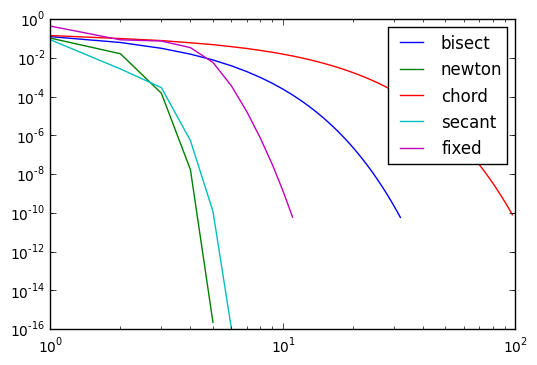

In [19]:

loglog(error_bisect, label='bisect')
loglog(error_newton, label = 'newton')
loglog(error_chord, label='chord')
loglog(error_secant, label='secant')
loglog(error_fixed, label='fixed')
_ = legend()

In [12]:
import scipy.optimize as opt
%time opt.newton(f,1.0,f_prime, tol=eps)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 40.1 µs


0.906179845938664